In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
file_path = r'D:\User\Desktop\GT\jupyter\auto+mpg\auto-mpg.data'

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower',
                'weight', 'acceleration', 'model_year', 'origin', 'car_name']

df = pd.read_csv(file_path, sep=r'\s+', names=column_names, na_values='?')
print(df.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0  3504.0          12.0   
1  15.0          8         350.0       165.0  3693.0          11.5   
2  18.0          8         318.0       150.0  3436.0          11.0   
3  16.0          8         304.0       150.0  3433.0          12.0   
4  17.0          8         302.0       140.0  3449.0          10.5   

   model_year  origin                   car_name  
0          70       1  chevrolet chevelle malibu  
1          70       1          buick skylark 320  
2          70       1         plymouth satellite  
3          70       1              amc rebel sst  
4          70       1                ford torino  


In [72]:
info = df.drop(['origin','car_name'],axis=1)
info = info[["cylinders","displacement","horsepower","weight","acceleration","model_year","mpg"]]
info = info.dropna()
info

,cylinders,displacement,horsepower,weight,acceleration,model_year,mpg
0,8,307.0,130.0,3504.0,12.0,70,18.0
1,8,350.0,165.0,3693.0,11.5,70,15.0
2,8,318.0,150.0,3436.0,11.0,70,18.0
3,8,304.0,150.0,3433.0,12.0,70,16.0
4,8,302.0,140.0,3449.0,10.5,70,17.0
...,...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82,27.0
394,4,97.0,52.0,2130.0,24.6,82,44.0
395,4,135.0,84.0,2295.0,11.6,82,32.0
396,4,120.0,79.0,2625.0,18.6,82,28.0


In [19]:
x = info.drop("mpg",axis = 1).values.tolist()
x = np.array(x)
x = (x - np.mean(x, axis=0)) / np.std(x, axis=0)
print(x)

[[ 1.48394702  1.07728956  0.66413273  0.62054034 -1.285258   -1.62531533]
 [ 1.48394702  1.48873169  1.57459447  0.84333403 -1.46672362 -1.62531533]
 [ 1.48394702  1.1825422   1.18439658  0.54038176 -1.64818924 -1.62531533]
 ...
 [-0.86401356 -0.56847897 -0.53247413 -0.80463202 -1.4304305   1.63640964]
 [-0.86401356 -0.7120053  -0.66254009 -0.41562716  1.11008813  1.63640964]
 [-0.86401356 -0.72157372 -0.58450051 -0.30364091  1.40043312  1.63640964]]


In [20]:
y = info['mpg'].values.tolist()
y = np.array(y)
print(y)

[18.  15.  18.  16.  17.  15.  14.  14.  14.  15.  15.  14.  15.  14.
 24.  22.  18.  21.  27.  26.  25.  24.  25.  26.  21.  10.  10.  11.
  9.  27.  28.  25.  19.  16.  17.  19.  18.  14.  14.  14.  14.  12.
 13.  13.  18.  22.  19.  18.  23.  28.  30.  30.  31.  35.  27.  26.
 24.  25.  23.  20.  21.  13.  14.  15.  14.  17.  11.  13.  12.  13.
 19.  15.  13.  13.  14.  18.  22.  21.  26.  22.  28.  23.  28.  27.
 13.  14.  13.  14.  15.  12.  13.  13.  14.  13.  12.  13.  18.  16.
 18.  18.  23.  26.  11.  12.  13.  12.  18.  20.  21.  22.  18.  19.
 21.  26.  15.  16.  29.  24.  20.  19.  15.  24.  20.  11.  20.  19.
 15.  31.  26.  32.  25.  16.  16.  18.  16.  13.  14.  14.  14.  29.
 26.  26.  31.  32.  28.  24.  26.  24.  26.  31.  19.  18.  15.  15.
 16.  15.  16.  14.  17.  16.  15.  18.  21.  20.  13.  29.  23.  20.
 23.  24.  25.  24.  18.  29.  19.  23.  23.  22.  25.  33.  28.  25.
 25.  26.  27.  17.5 16.  15.5 14.5 22.  22.  24.  22.5 29.  24.5 29.
 33.  20.  18.  18.5

In [21]:
def costcalcu(x,y,w,b):
    m = len(y)
    y_pred = np.dot(x, w) + b
    cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
    return cost

In [22]:
def mullinregress(x,y,w,b,learning_rate,iterations):
    m,n=x.shape
    cost = []
    for i in range(iterations):
        ypred = np.dot(x,w) + b
        error = ypred - y
        dw = np.dot(x.T,error)/m
        db = np.sum(error)/m
        w-=learning_rate*dw
        b-=learning_rate*db
        c = costcalcu(x,y,w,b)
        cost.append(c)
    return w,b,cost

In [41]:
def main(x,y):
    learning_rate = 0.01
    iterations = 1000
    w = np.zeros(x.shape[1])
    w,b,cost = mullinregress(x,y,w,0,learning_rate,iterations)
    print(f"Weight calculated = {w}")
    print(f"Bias calculated = {b}")

    plt.plot(range(iterations),cost)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.show()

Weight calculated = [-0.64633107 -0.73655595 -0.89642375 -3.65411359 -0.35769072  2.62222347]
Bias calculated = 23.44490617780432


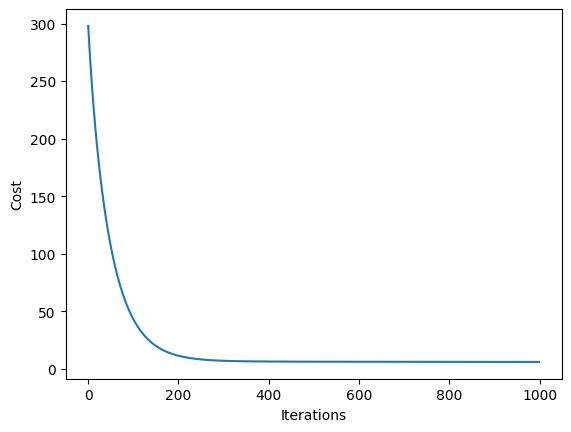

In [42]:
main(x,y)

Cylinders 3: 4
Cylinders 4: 199
Cylinders 5: 3
Cylinders 6: 83
Cylinders 7: 0
Cylinders 8: 103


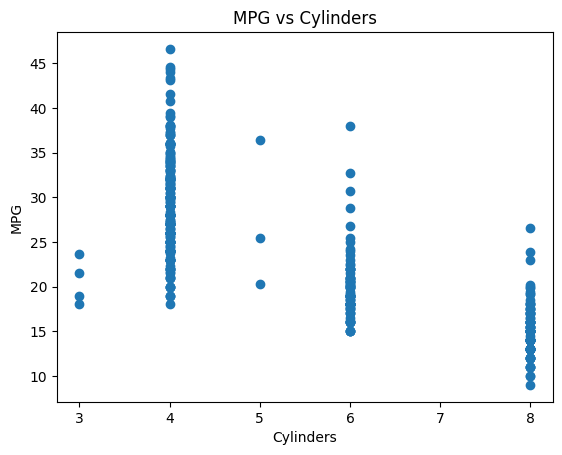

In [62]:
gr = info.drop("mpg",axis = 1).values.tolist()
gry = info['mpg'].values.tolist()
grx = [row[0] for row in gr]
c3=c4=c5=c6=c7=c8=0
for i in grx:
    if i == 3:
        c3 += 1
    elif i == 4:
        c4 += 1
    elif i == 5:
        c5 += 1
    elif i == 6:
        c6 += 1
    elif i == 7:
        c7 += 1
    elif i == 8:
        c8 += 1
print(f"Cylinders 3: {c3}")
print(f"Cylinders 4: {c4}")
print(f"Cylinders 5: {c5}")
print(f"Cylinders 6: {c6}")
print(f"Cylinders 7: {c7}")
print(f"Cylinders 8: {c8}")
plt.scatter(grx, gry)
plt.xlabel("Cylinders")
plt.ylabel("MPG")
plt.title("MPG vs Cylinders")
plt.show()


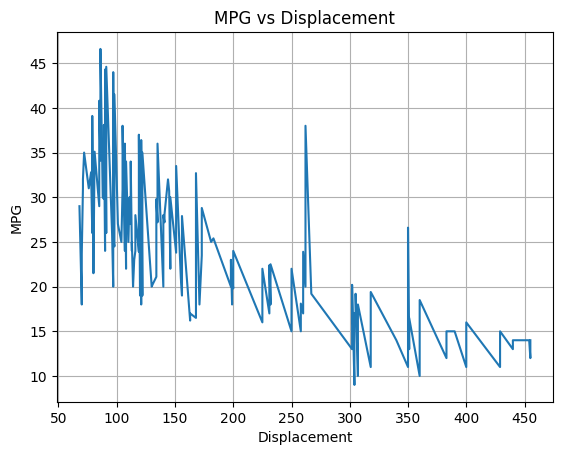

In [63]:
grx = [row[1] for row in gr]
combined = sorted(zip(grx, gry))  
sorted_grx, sorted_gry = zip(*combined)

plt.plot(sorted_grx, sorted_gry)
plt.xlabel("Displacement")
plt.ylabel("MPG")
plt.title("MPG vs Displacement")
plt.grid(True)
plt.show()

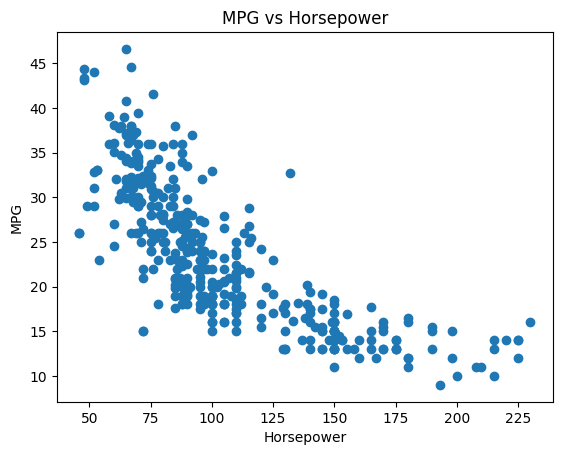

In [67]:
grx = [row[2] for row in gr]
plt.scatter(grx, gry)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("MPG vs Horsepower")
plt.show()

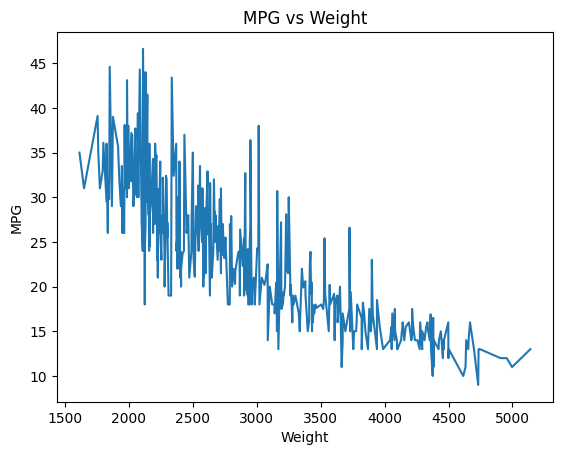

In [69]:
grx = [row[3] for row in gr]
combined = sorted(zip(grx, gry))  
sorted_grx, sorted_gry = zip(*combined)

plt.plot(sorted_grx, sorted_gry)
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.title("MPG vs Weight")
plt.show()

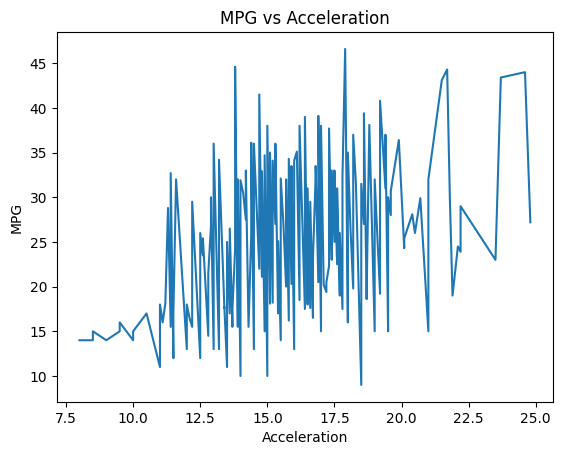

Confounding in data
Data of Acceleration is affected by other factors causing distortion.


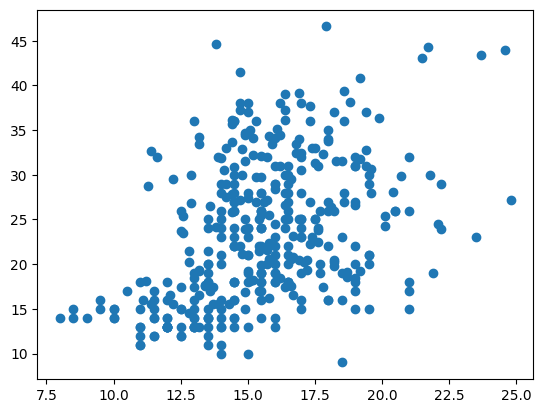

In [77]:
grx = [row[4] for row in gr]
combined = sorted(zip(grx, gry))  
sorted_grx, sorted_gry = zip(*combined)

plt.plot(sorted_grx, sorted_gry)
plt.xlabel("Acceleration")
plt.ylabel("MPG")
plt.title("MPG vs Acceleration")
plt.show()
plt.scatter(grx, gry)
print("Confounding in data\nData of Acceleration is affected by other factors causing distortion.")

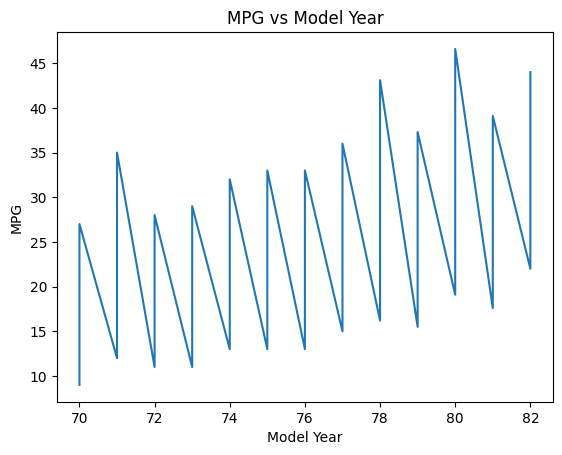

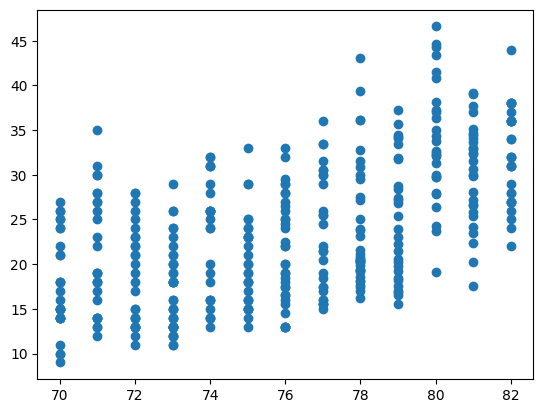

In [80]:
grx = [row[5] for row in gr]
combined = sorted(zip(grx, gry))  
sorted_grx, sorted_gry = zip(*combined)

plt.plot(sorted_grx, sorted_gry)
plt.xlabel("Model Year")
plt.ylabel("MPG")
plt.title("MPG vs Model Year")
plt.show()
plt.scatter(grx, gry)